### Phân bố của doanh thu và số lượng theo từng mặt hàng

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime 
import numpy as np
df=pd.read_csv("C:/Users/PC/Downloads/supermarket_sales.csv")
yangon=df.groupby('city').get_group('Yangon')
mandalay=df.groupby('city').get_group('Mandalay')
naypyitaw=df.groupby('city').get_group('Naypyitaw')

####  Tương quan giữa lợi nhuận, thuế, doanh thu và lượng hàng kh mua tại cửa hàng

In [2]:
sum_corr= yangon.groupby('product_line').sum()
sum_corr.drop(['unit_price','gross_margin_percentage','rating'],axis=1).corr()

,quantity,tax,cost,profit
quantity,1.000000,0.938035,0.938035,0.938035
tax,0.938035,1.000000,1.000000,1.000000
cost,0.938035,1.000000,1.000000,1.000000
profit,0.938035,1.000000,1.000000,1.000000


####  Lợi nhuận trung bình 

In [3]:
df['profit'].sum()/df['quantity'].sum()

2.791174047186933

In [4]:
def profit_mean(x,y):
    return x/y 
df.groupby('city').sum().apply(lambda x:profit_mean(x.profit,x.quantity),axis=1)

city
Mandalay     2.778589
Naypyitaw    2.875574
Yangon       2.720366
dtype: float64

#### Phân bố của lợi nhuận và doanh thu 

##### Lợi nhuận thu được phần lớn đạt dưới 25 đô/sản phẩm 

(array([233., 215., 146., 110.,  91.,  68.,  45.,  51.,  25.,  16.]),
 array([ 0.5085 ,  5.42265, 10.3368 , 15.25095, 20.1651 , 25.07925,
        29.9934 , 34.90755, 39.8217 , 44.73585, 49.65   ]),
 <BarContainer object of 10 artists>)

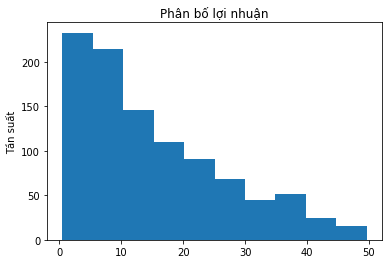

In [5]:
profit=df['profit'].tolist()
cost=df['cost'].tolist()
plt.ylabel('Tần suất')
plt.title('Phân bố lợi nhuận')
plt.hist(profit)

##### Doanh thu đạt được tập trung nhiều vào nhóm sản phẩm có mức giá dưới 400 đô 

(array([233., 215., 146., 110.,  91.,  68.,  45.,  51.,  25.,  16.]),
 array([ 10.17 , 108.453, 206.736, 305.019, 403.302, 501.585, 599.868,
        698.151, 796.434, 894.717, 993.   ]),
 <BarContainer object of 10 artists>)

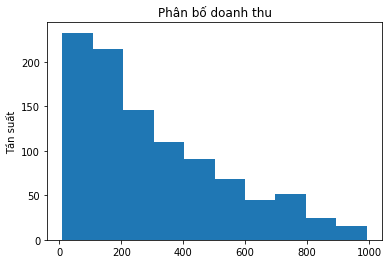

In [6]:
plt.ylabel('Tần suất')
plt.title('Phân bố doanh thu')
plt.hist(cost)

#### Phân bố của doanh thu và số lượng theo từng mặt hàng


##### Phân bố theo doanh thu theo từng mặt hàng 
+ Electronic accessories :tập trung nhiều vào nhóm sản phẩm có mức giá dưới 300 đô/sản phẩm
+ Fashion accessories :tập trung nhiều vào nhóm sản phẩm có mức giá dưới 200 đô/sản phẩm
+ Food and beverages :tập trung nhiều vào nhóm sản phẩm có mức giá dưới 300 đô/sản phẩm
+ Health and beauty: tập trung nhiều vào nhóm sản phẩm có mức giá dưới 300 đô/sản phẩm
+ Home and lifestyle: tập trung nhiều vào nhóm sản phẩm có mức giá dưới 300 đô/sản phẩm
+ Sports and travel: tập trung nhiều vào nhóm sản phẩm có mức giá dưới 400 đô/sản phẩm


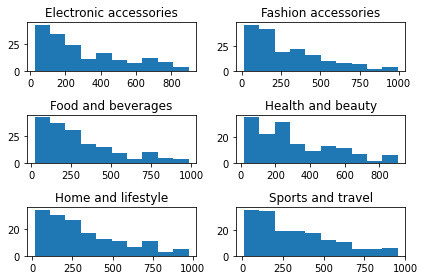

In [7]:
EA=df[df['product_line']=='Electronic accessories']['cost']
FA=df[df['product_line']=='Fashion accessories']['cost']
FB=df[df['product_line']=='Food and beverages']['cost']
HB=df[df['product_line']=='Health and beauty']['cost']
HL=df[df['product_line']=='Home and lifestyle']['cost']
ST=df[df['product_line']=='Sports and travel']['cost']
data=[EA,FA,FB,HB,HL,ST]
titles = ['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
f,a = plt.subplots(3,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx])
    ax.set_title(titles[idx])
f.tight_layout()
plt.show()

#### Phân bố theo số lượng theo từng mặt hàng 


+ Electronic accessories : khách hàng thường sẽ mua ít nhất từ 3 đến 8 sản phẩm đối với loại mặt hàng này cho mỗi lần mua 
+ Fashion accessories : phần trăm khách hàng mua trên 4 sản phẩm đối với loại mặt hàng này không cao
+ Food and beverages : khách hàng thường sẽ mua ít nhất từ 3 đến 8 sản phẩm đối với loại mặt hàng này cho mỗi lần mua
+ Health and beauty: lượng mua trải đều trong mỗi lần mua từ 2-9 sản phẩm
+ Home and lifestyle: tỉ lệ mua từ 6-9 sản phẩm trên mỗi lần mua lớn đối với loại mặt hàng này
+ Sports and travel: không đều,đạt tốt nhất với mức mua ở 7 và 10 sản phẩm đối với loại mặt hàng này

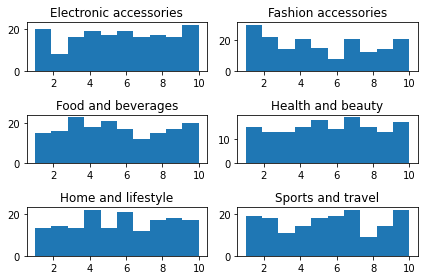

In [8]:
EA=df[df['product_line']=='Electronic accessories']['quantity']
FA=df[df['product_line']=='Fashion accessories']['quantity']
FB=df[df['product_line']=='Food and beverages']['quantity']
HB=df[df['product_line']=='Health and beauty']['quantity']
HL=df[df['product_line']=='Home and lifestyle']['quantity']
ST=df[df['product_line']=='Sports and travel']['quantity']
data=[EA,FA,FB,HB,HL,ST]
titles = ['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
f,a = plt.subplots(3,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx])
    ax.set_title(titles[idx])
f.tight_layout()
plt.show()